## Predicción de Calidad del Vino (Core)
# Elida Peña

**Objetivo**

Utilizar técnicas de clasificación aprendidas hasta el momento para predecir la calidad del vino basándose en características físico-químicas. Este ejercicio permitirá aplicar conceptos como la selección de características, preprocesamiento de datos, entrenamiento y evaluación de modelos de clasificación, y análisis de resultados mediante métricas y visualizaciones.

**Descripción del Dataset:** Este conjunto de datos contiene información sobre distintas características físico-químicas de muestras de vino tinto y su calidad asociada. Las características incluyen acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos y alcohol. La calidad del vino está clasificada en una escala del 0 al 10.

**Instrucciones:**

 **1. Carga y Exploración de Datos:**

* Cargar el dataset y revisar su estructura básica.

* Describir las variables y su distribución.

* Identificar y tratar valores nulos y outliers.

In [3]:
import pandas as pd

In [16]:
#Cargar el dataset y revisar su estructura básica.
# Cargar el dataset
url = "../data/WineQT.csv"
df = pd.read_csv(url, sep=',')

# Revisar la estructura básica del dataset
print(df.head())
print(df.info())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

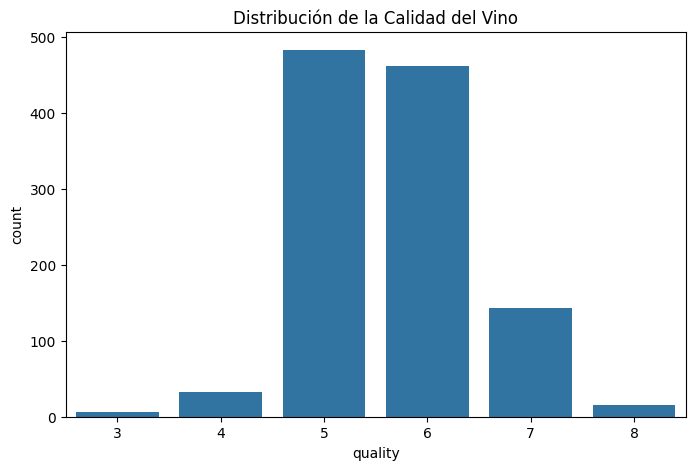

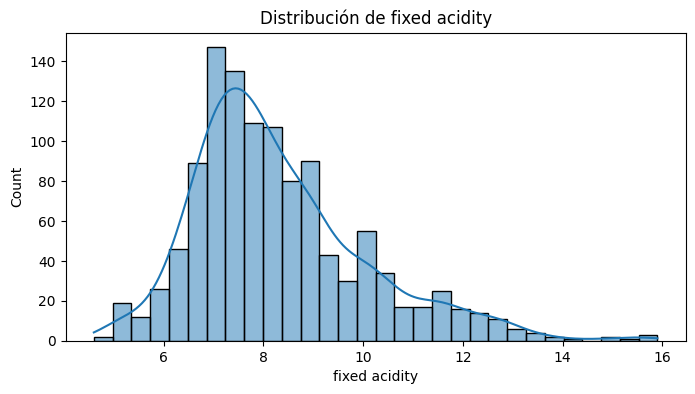

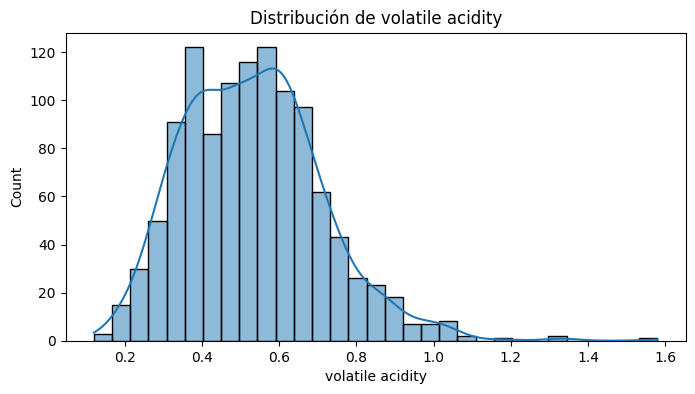

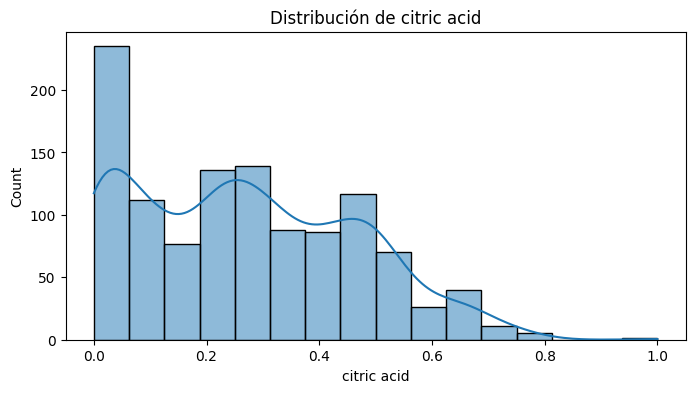

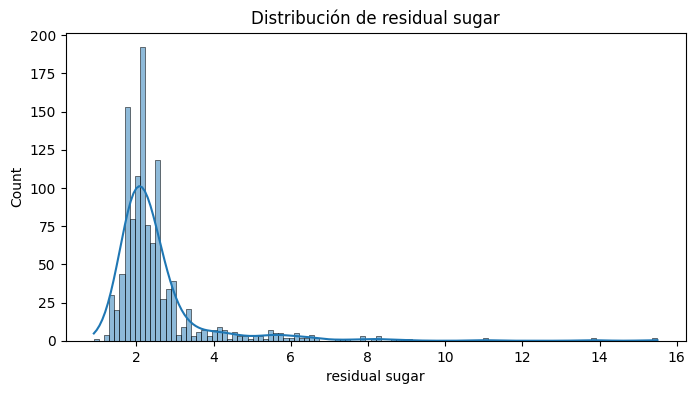

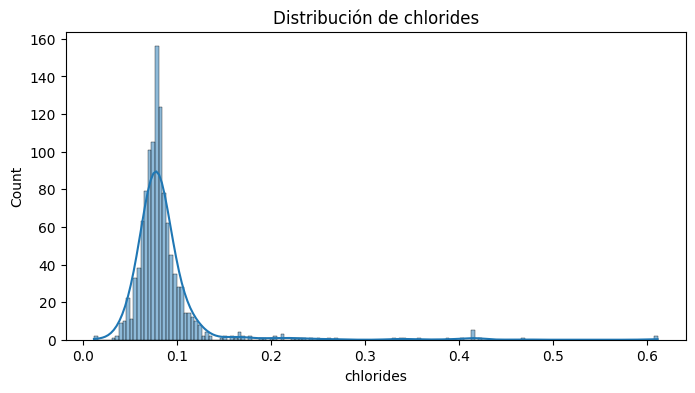

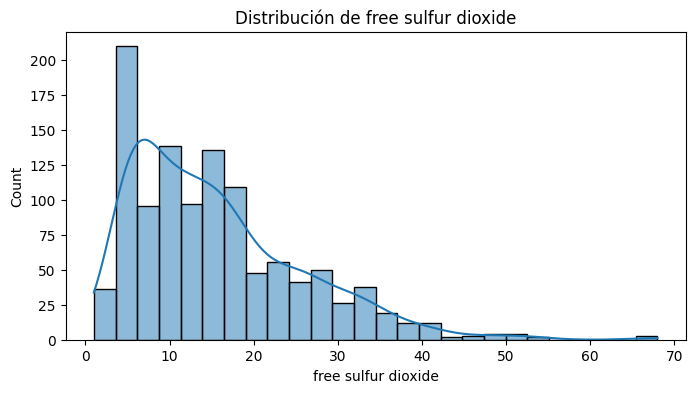

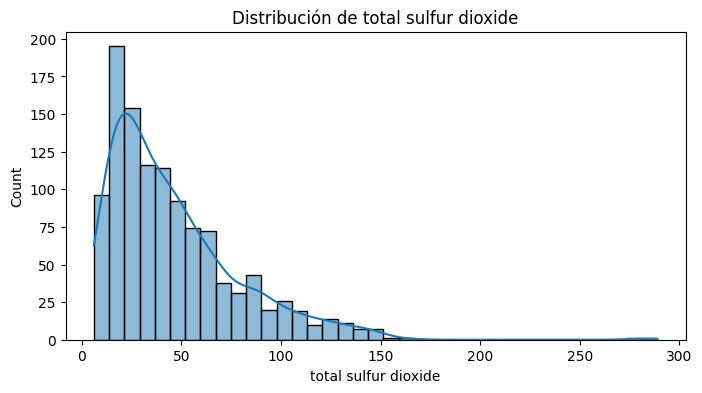

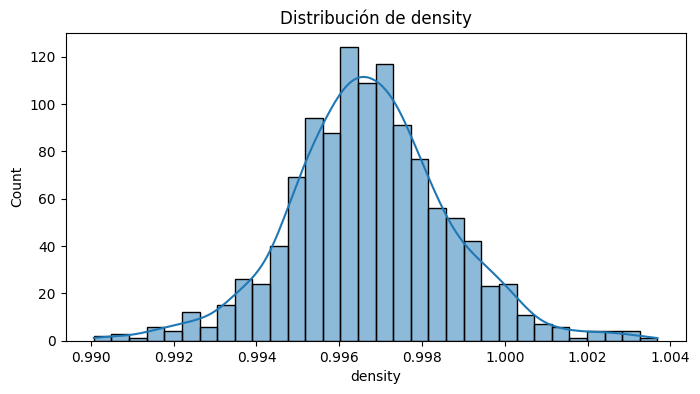

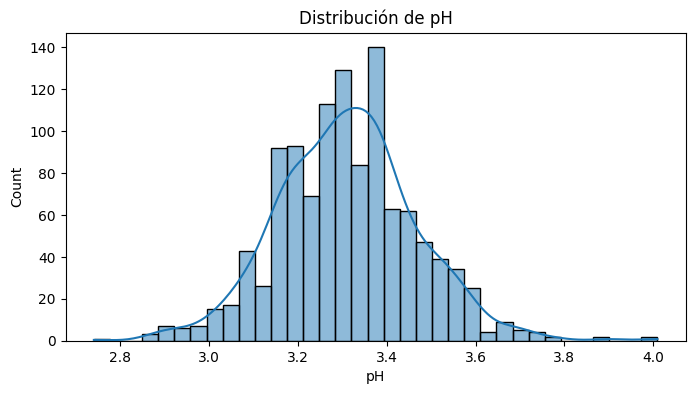

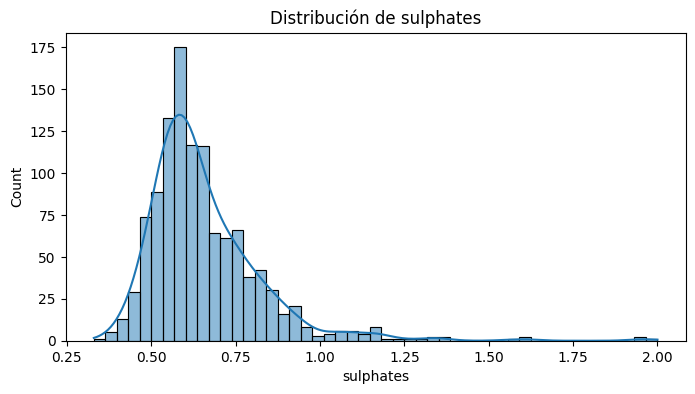

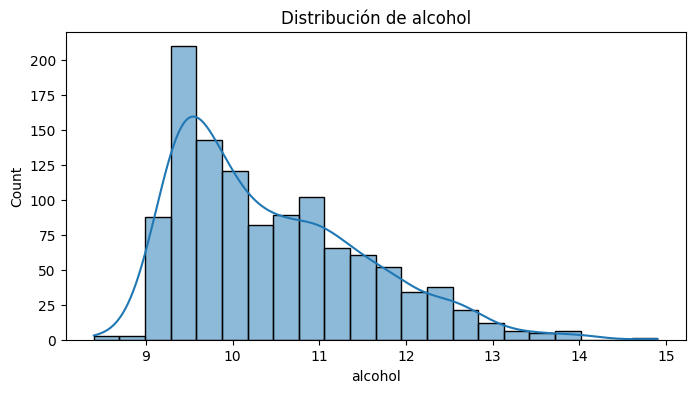

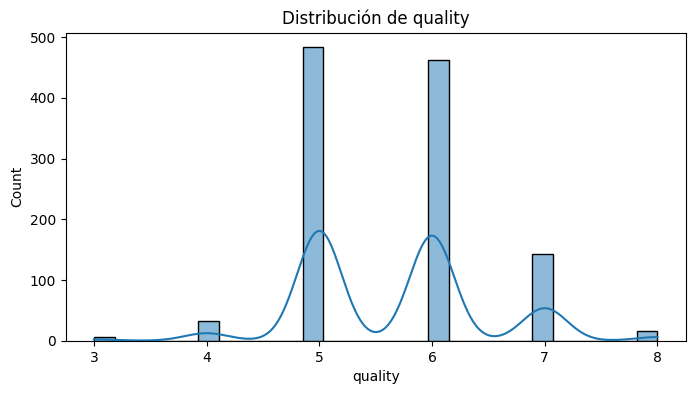

In [17]:
#Describir las variables y su distribución.
# Descripción estadística de las variables numéricas
print(df.describe())

# Distribución de la variable objetivo (calidad del vino)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x = "quality", data=df)
plt.title('Distribución de la Calidad del Vino')
plt.show()

# Distribuciones de características numéricas
for col in df.columns[:-1]:  # Excluir la columna 'quality'
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()


In [ ]:
# Identificar y tratar valores nulos y atípicos
# Verificar valores nulos
print(df.isnull().sum)

# Tratar valores atípicos usando el rango intercuartílico (IQR)
for col in df.columns[:-1]:  # Excluyendo la variable de calidad
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


<bound method DataFrame.sum of       fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0                                                 False                                                                                                   
1                                                 False                                                                                                   
2                                                 False                                                                                                   
3                                                 False                                                                                                   
4                                                 False                                                                                                   
...                                    

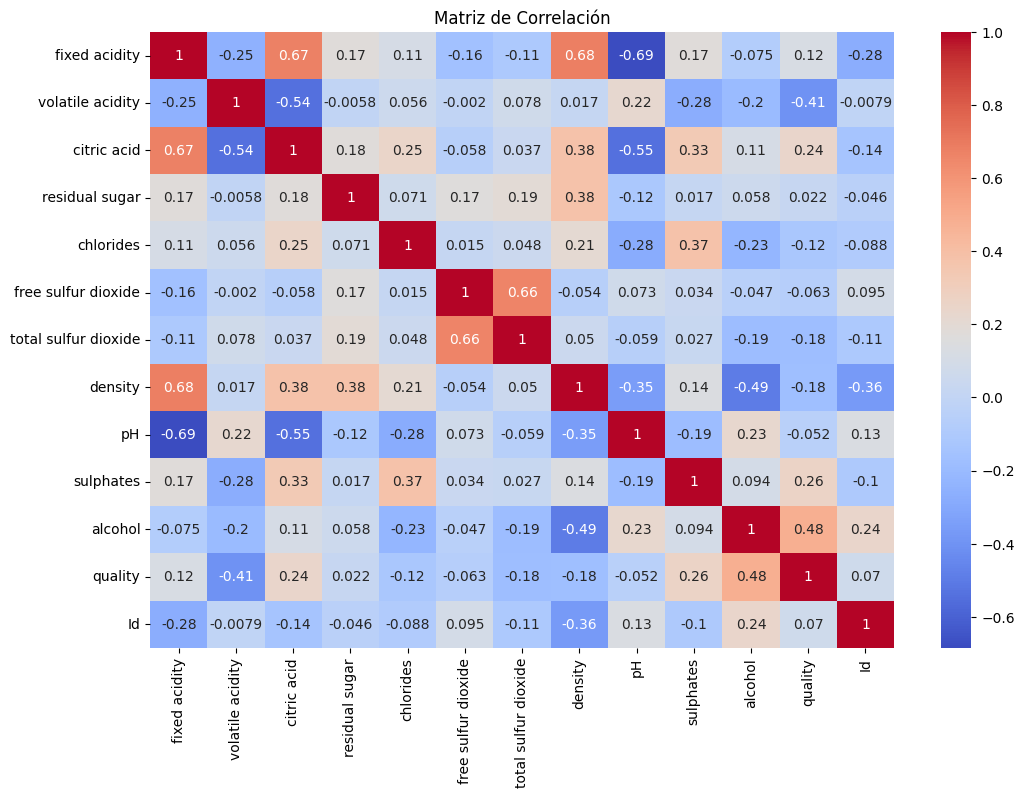

In [ ]:
#4. Preprocesamiento de Datos
#a. Seleccionar características importantes para la clasificación
# Matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [2]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


ModuleNotFoundError: No module named 'sklearn'